In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

In [2]:
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
matplotlib.rcParams['font.size']=28

In [3]:
CDM_i_1 = tcDM_i_1 = CDM_i_2 = tcDM_i_2 = 4



snap_CDM_1 = h5py.File('/home/ryan/Data/Data0/snaps/run_CDM_L3N128/snap_00{}.hdf5'.format(CDM_i_1), 'r')
#snap_2cDM_1 = h5py.File('/home/ryan/Data/Data1/run_2cDM_L3N512_DM_power00_sigma1/snap_00{}.hdf5'.format(tcDM_i_1), 'r')
Redshift_CDM_1 = Redshift_CDM_2 = \
Redshift_2cDM_1 = Redshift_2cDM_2 = "{:.2f}".format(snap_CDM_1['Header'].attrs['Redshift'])
#Redshift_2cDM_1 = "{:.2f}".format(snap_2cDM_1['Header'].attrs['Redshift'])



"""snap_CDM_2 = h5py.File('/home/ryan/Data/Data2/run_CDM_L3N512/snap_00{}.hdf5'.format(CDM_i_2), 'r')
snap_2cDM_2 = h5py.File('/home/ryan/Data/Data2/run_2cDM_L3N512_power00_sigma1/snap_00{}.hdf5'.format(tcDM_i_2), 'r')
Redshift_CDM_2 ="{:.2f}".format(snap_CDM_2['Header'].attrs['Redshift'])
Redshift_2cDM_2 = "{:.2f}".format(snap_2cDM_2['Header'].attrs['Redshift'])
"""
fpath = '/home/ryan/Downloads/plots_compare/'
#fpath = '/home/ryan/Downloads/'
pkpath_1 = '/home/ryan/genPK/run_L3N512_DM/'
pkpath_2 = '/home/ryan/genPK/run_L3N512/'

mpkpath_1 = '/home/ryan/genPK/run_L3N256_DM_power00_sigma1/'
mpkpath_2 = '/home/ryan/genPK/run_L3N256_lower_softening/'

lpkpath_1 = '/home/ryan/genPK/run_L3N128_DM/'
lpkpath_2 = '/home/ryan/genPK/run_L3N128_sigma1/'

#print(Redshift_CDM_1)
#print(Redshift_2cDM_1)
print(Redshift_CDM_2)
print(Redshift_2cDM_2)
#(Redshift_CDM_1 == Redshift_2cDM_1) and (Redshift_CDM_1 == Redshift_2cDM_2)

3.00
3.00


In [4]:
def calculate_fourier_conversion(Boxsize):
    '''
    Takes the Boxsize in kpc and produces the conversion factors
    from Fourier units to physical units. For use with genPK output.
    '''
    Boxsize = Boxsize / 1000 # convert to Mpc

    k_conv = 2*np.pi / Boxsize
    p_conv = (Boxsize / (2 * np.pi))**3
    
    return k_conv, p_conv

In [5]:
#Boxsize_2 = int((snap_CDM_2['Header'].attrs['BoxSize'])) # in kpc
Boxsize_1 = int((snap_CDM_1['Header'].attrs['BoxSize'])) # in kpc
Boxsize_2 = Boxsize_1

k_conv_1, p_conv_1 = calculate_fourier_conversion(Boxsize_1)
k_conv_2, p_conv_2 = calculate_fourier_conversion(Boxsize_2)

In [6]:
def get_genPK_data(fpath, k_conv, p_conv):
    
    genPK = np.loadtxt(fpath)
    
    bins = genPK[:, 0]
    pk = genPK[:, 1]
    
    dk = pk * (2 * np.pi)**3 * (4 * np.pi) * bins**3
    
    bins = genPK[:, 0] * k_conv
    
    pk = genPK[:, 1] * p_conv
    
    return bins, pk, dk

In [7]:
# get DM data for both

cdm_str = 'PK-DM-snap_00{}_CDM.hdf5'
tcdm_str = 'PK-DM-snap_00{}_2cDM.hdf5'

bins_cdm_1, pk_cdm_1, dk_cdm_1 = get_genPK_data(pkpath_1 + cdm_str.format(CDM_i_1),\
                                                k_conv_1, p_conv_1)
bins_2cdm_1, pk_2cdm_1, dk_2cdm_1 = get_genPK_data(pkpath_1 + tcdm_str.format(tcDM_i_1),\
                                                k_conv_1, p_conv_1)
bins_cdm_2, pk_cdm_2, dk_cdm_2 = get_genPK_data(pkpath_2 + cdm_str.format(CDM_i_2),\
                                                k_conv_2, p_conv_2)
bins_2cdm_2, pk_2cdm_2, dk_2cdm_2 = get_genPK_data(pkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)
mbins_cdm_1, mpk_cdm_1, mdk_cdm_1 = get_genPK_data(mpkpath_1 + cdm_str.format(CDM_i_1),\
                                                k_conv_1, p_conv_1)
mbins_2cdm_1, mpk_2cdm_1, mdk_2cdm_1 = get_genPK_data(mpkpath_1 + tcdm_str.format(tcDM_i_1),\
                                                k_conv_1, p_conv_1)
mbins_cdm_2, mpk_cdm_2, mdk_cdm_2 = get_genPK_data(mpkpath_2 + cdm_str.format(CDM_i_2),\
                                                k_conv_2, p_conv_2)
mbins_2cdm_2, mpk_2cdm_2, mdk_2cdm_2 = get_genPK_data(mpkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

lbins_cdm_1, lpk_cdm_1, ldk_cdm_1 = get_genPK_data(lpkpath_1 + cdm_str.format(CDM_i_1),\
                                                k_conv_1, p_conv_1)
lbins_2cdm_1, lpk_2cdm_1, ldk_2cdm_1 = get_genPK_data(lpkpath_1 + tcdm_str.format(tcDM_i_1),\
                                                k_conv_1, p_conv_1)
lbins_cdm_2, lpk_cdm_2, ldk_cdm_2 = get_genPK_data(lpkpath_2 + cdm_str.format(CDM_i_2),\
                                                k_conv_2, p_conv_2)
lbins_2cdm_2, lpk_2cdm_2, ldk_2cdm_2 = get_genPK_data(lpkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

In [8]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


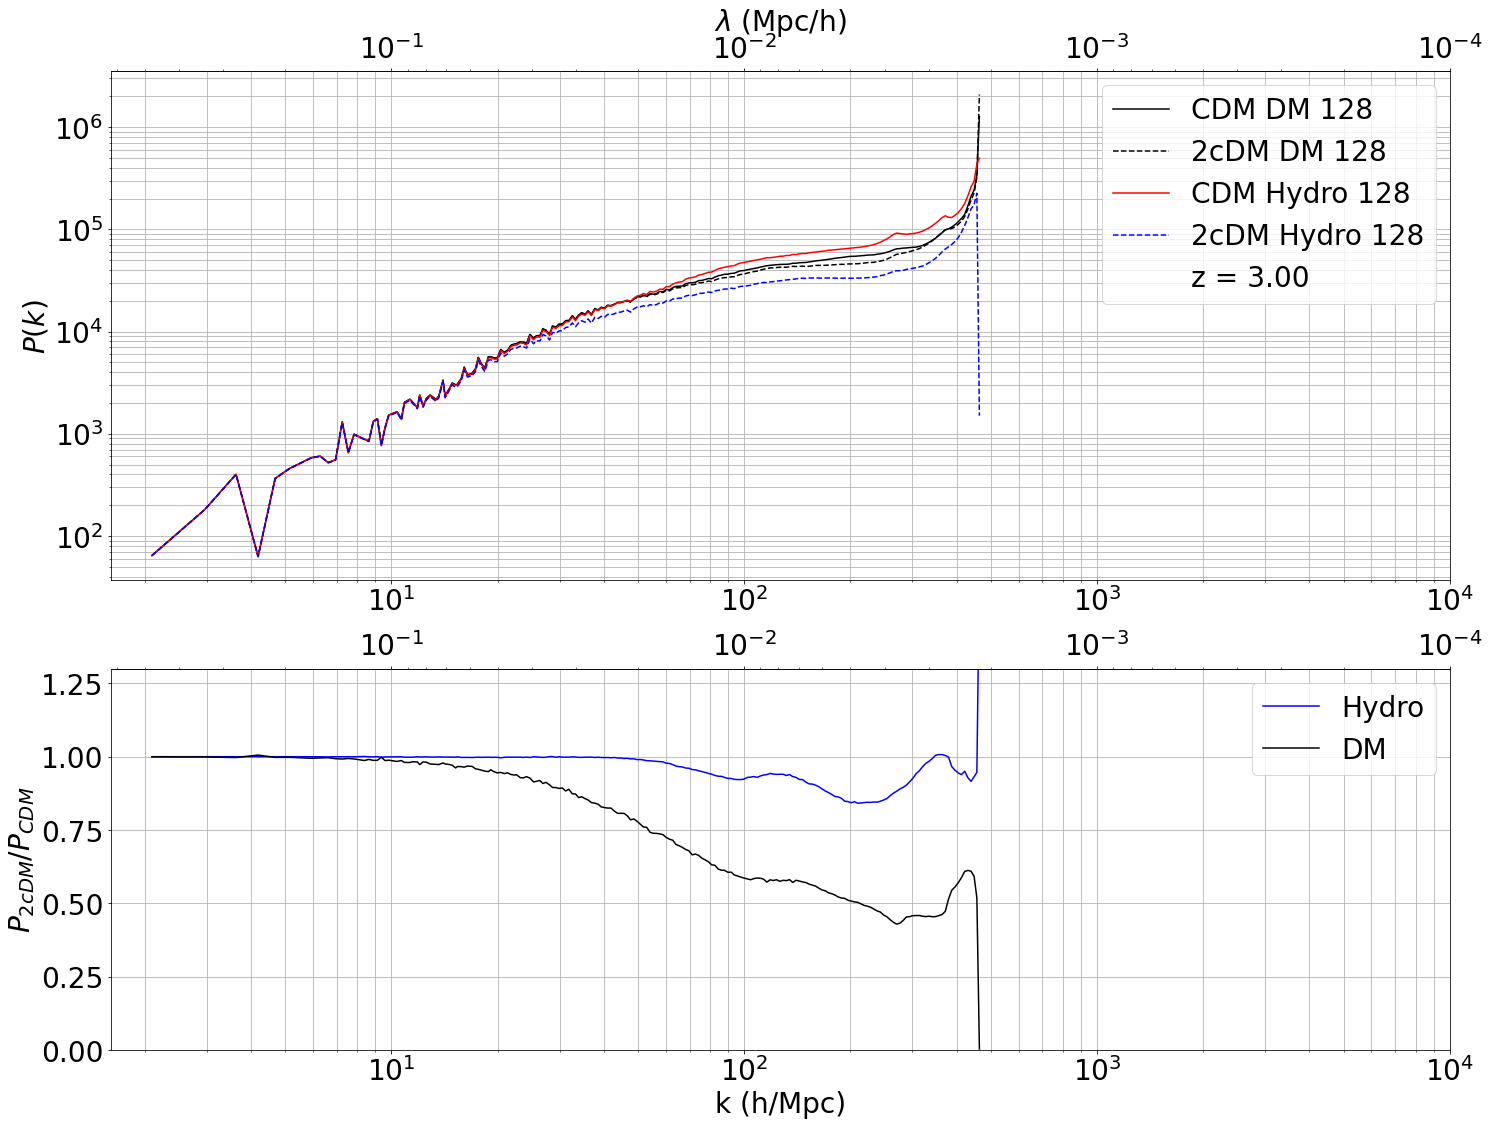

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [4, 3]})
"""ax0.plot(bins_cdm_1,dk_cdm_1, label='CDM DM 512', color='k')
ax0.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM DM 512', color='k')
ax0.plot(bins_cdm_2,dk_cdm_2, label='CDM Hydro 512', color='r')
ax0.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM Hydro 512', color='b')

ax0.plot(mbins_cdm_1,mdk_cdm_1, label='CDM DM 256', color='k')
ax0.plot(mbins_2cdm_1,mdk_2cdm_1, '--',label='2cDM DM 256', color='k')
ax0.plot(mbins_cdm_2,mdk_cdm_2, label='CDM Hydro 256', color='r')
ax0.plot(mbins_2cdm_2,mdk_2cdm_2, '--',label='2cDM Hydro 256', color='b')"""

ax0.plot(lbins_cdm_1,ldk_cdm_1, label='CDM DM 128', color='k')
ax0.plot(lbins_2cdm_1,ldk_2cdm_1, '--',label='2cDM DM 128', color='k')
ax0.plot(lbins_cdm_2,ldk_cdm_2, label='CDM Hydro 128', color='r')
ax0.plot(lbins_2cdm_2,ldk_2cdm_2, '--',label='2cDM Hydro 128', color='b')


#ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)

ax0.set_xlim(0, 10**4)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum $512^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

"""ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='b', label='Hydro')
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='k', label='DM')

ax1.plot(mbins_2cdm_1 ,mpk_2cdm_1 / mpk_cdm_1, color='b', label='Hydro')
ax1.plot(mbins_2cdm_2 ,mpk_2cdm_2 / mpk_cdm_2, color='k', label='DM')"""

ax1.plot(lbins_2cdm_1 ,lpk_2cdm_1 / lpk_cdm_1, color='b', label='Hydro')
ax1.plot(lbins_2cdm_2 ,lpk_2cdm_2 / lpk_cdm_2, color='k', label='DM')



ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

#ax1.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)
#ax1.plot([],[], label='(0, 0) $\sigma = 1$', alpha=0)
#ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**4)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = 'DM_Spectrum_with_Ratio_128.png'
plt.savefig(fpath+fname, dpi=128)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


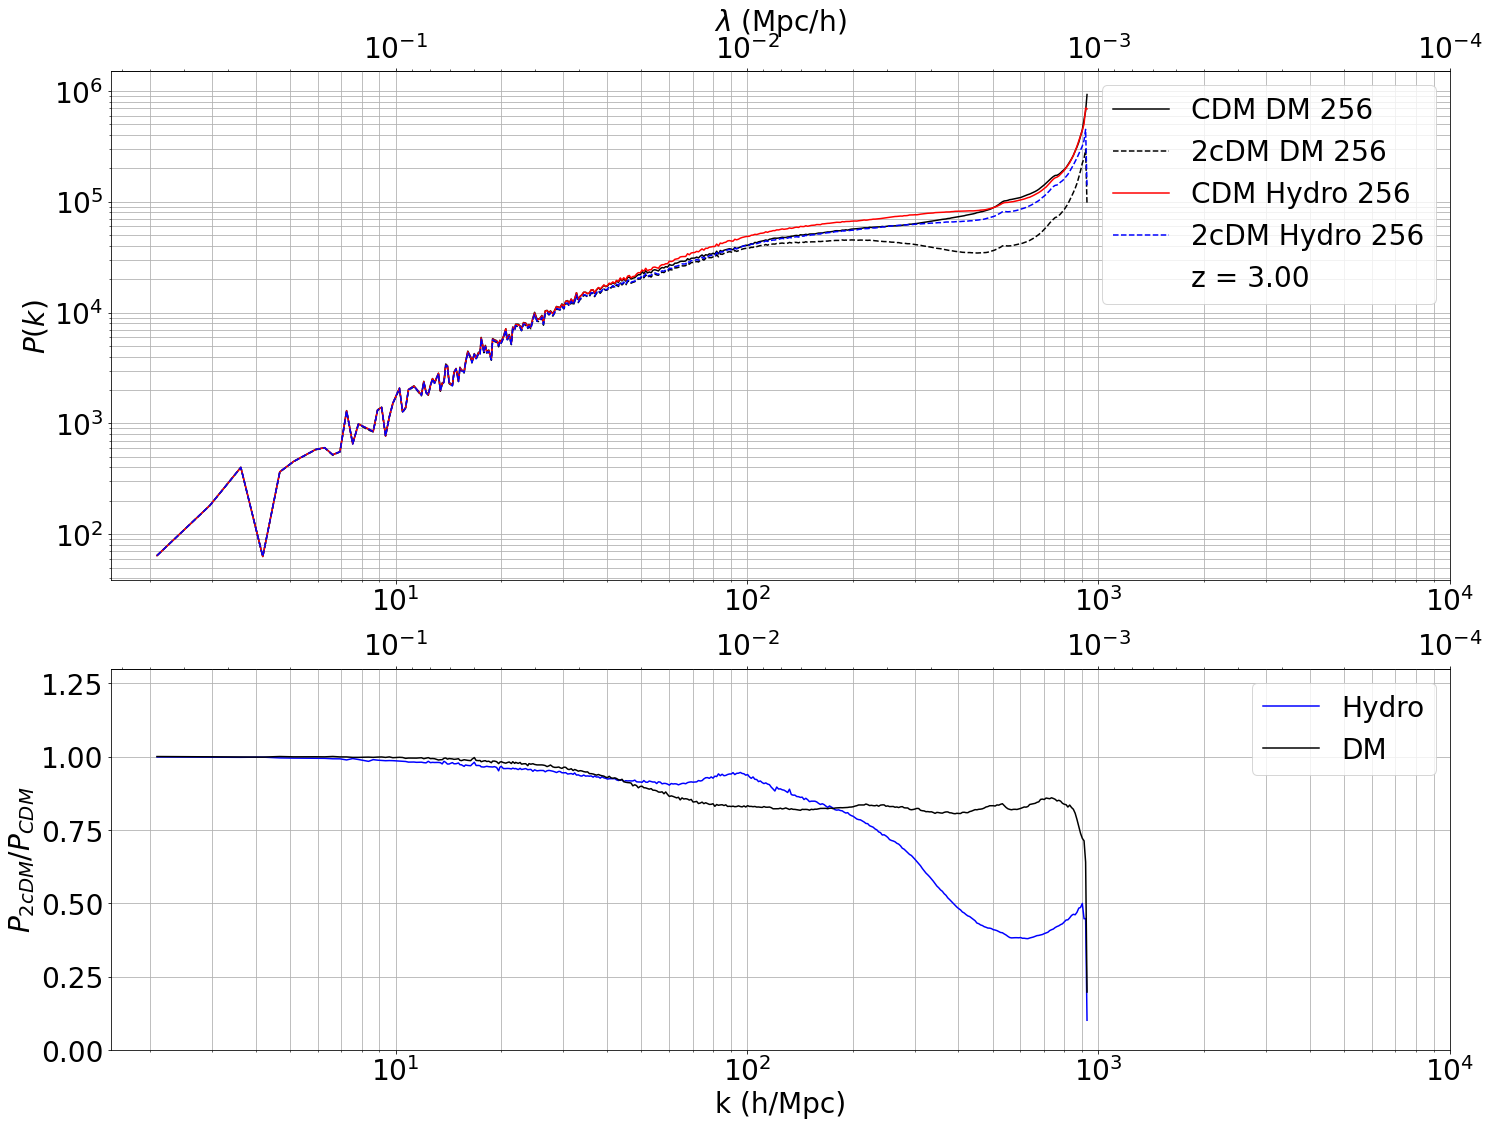

In [10]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [4, 3]})
"""ax0.plot(bins_cdm_1,dk_cdm_1, label='CDM DM 512', color='k')
ax0.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM DM 512', color='k')
ax0.plot(bins_cdm_2,dk_cdm_2, label='CDM Hydro 512', color='r')
ax0.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM Hydro 512', color='b')"""

ax0.plot(mbins_cdm_1,mdk_cdm_1, label='CDM DM 256', color='k')
ax0.plot(mbins_2cdm_1,mdk_2cdm_1, '--',label='2cDM DM 256', color='k')
ax0.plot(mbins_cdm_2,mdk_cdm_2, label='CDM Hydro 256', color='r')
ax0.plot(mbins_2cdm_2,mdk_2cdm_2, '--',label='2cDM Hydro 256', color='b')

"""ax0.plot(lbins_cdm_1,ldk_cdm_1, label='CDM DM 128', color='k')
ax0.plot(lbins_2cdm_1,ldk_2cdm_1, '--',label='2cDM DM 128', color='k')
ax0.plot(lbins_cdm_2,ldk_cdm_2, label='CDM Hydro 128', color='r')
ax0.plot(lbins_2cdm_2,ldk_2cdm_2, '--',label='2cDM Hydro 128', color='b')"""


#ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)

ax0.set_xlim(0, 10**4)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum $512^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

"""ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='b', label='Hydro')
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='k', label='DM')"""

ax1.plot(mbins_2cdm_1 ,mpk_2cdm_1 / mpk_cdm_1, color='b', label='Hydro')
ax1.plot(mbins_2cdm_2 ,mpk_2cdm_2 / mpk_cdm_2, color='k', label='DM')

"""ax1.plot(lbins_2cdm_1 ,lpk_2cdm_1 / lpk_cdm_1, color='b', label='Hydro')
ax1.plot(lbins_2cdm_2 ,lpk_2cdm_2 / lpk_cdm_2, color='k', label='DM')"""



ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

#ax1.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)
#ax1.plot([],[], label='(0, 0) $\sigma = 1$', alpha=0)
#ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**4)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = 'DM_Spectrum_with_Ratio_256.png'
plt.savefig(fpath+fname, dpi=128)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


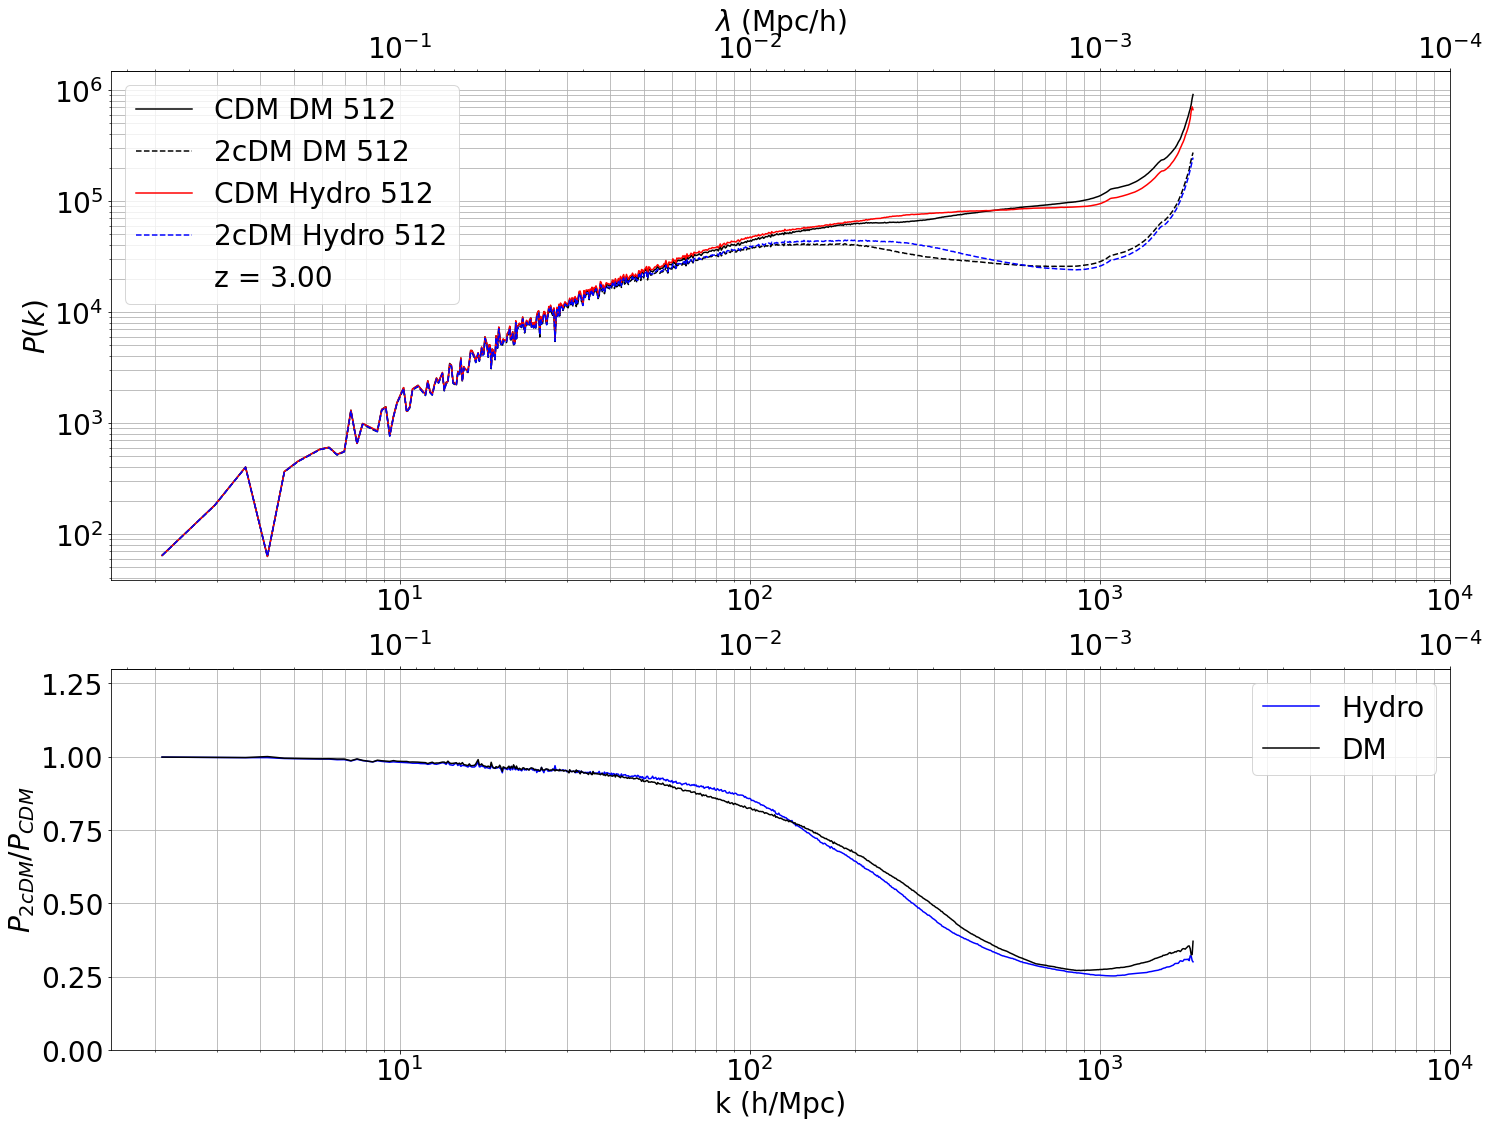

In [11]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [4, 3]})
ax0.plot(bins_cdm_1,dk_cdm_1, label='CDM DM 512', color='k')
ax0.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM DM 512', color='k')
ax0.plot(bins_cdm_2,dk_cdm_2, label='CDM Hydro 512', color='r')
ax0.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM Hydro 512', color='b')

"""ax0.plot(mbins_cdm_1,mdk_cdm_1, label='CDM DM 256', color='k')
ax0.plot(mbins_2cdm_1,mdk_2cdm_1, '--',label='2cDM DM 256', color='k')
ax0.plot(mbins_cdm_2,mdk_cdm_2, label='CDM Hydro 256', color='r')
ax0.plot(mbins_2cdm_2,mdk_2cdm_2, '--',label='2cDM Hydro 256', color='b')

ax0.plot(lbins_cdm_1,ldk_cdm_1, label='CDM DM 128', color='k')
ax0.plot(lbins_2cdm_1,ldk_2cdm_1, '--',label='2cDM DM 128', color='k')
ax0.plot(lbins_cdm_2,ldk_cdm_2, label='CDM Hydro 128', color='r')
ax0.plot(lbins_2cdm_2,ldk_2cdm_2, '--',label='2cDM Hydro 128', color='b')"""


#ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)

ax0.set_xlim(0, 10**4)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum $512^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='b', label='Hydro')
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='k', label='DM')

"""ax1.plot(mbins_2cdm_1 ,mpk_2cdm_1 / mpk_cdm_1, color='b', label='Hydro')
ax1.plot(mbins_2cdm_2 ,mpk_2cdm_2 / mpk_cdm_2, color='k', label='DM')

ax1.plot(lbins_2cdm_1 ,lpk_2cdm_1 / lpk_cdm_1, color='b', label='Hydro')
ax1.plot(lbins_2cdm_2 ,lpk_2cdm_2 / lpk_cdm_2, color='k', label='DM')"""



ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

#ax1.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)
#ax1.plot([],[], label='(0, 0) $\sigma = 1$', alpha=0)
#ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**4)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = 'DM_Spectrum_with_Ratio_512.png'
plt.savefig(fpath+fname, dpi=128)
plt.show()

In [12]:
# get by data for both

cdm_str = 'PK-by-snap_00{}_CDM.hdf5'
tcdm_str = 'PK-by-snap_00{}_2cDM.hdf5'


bins_cdm_2, pk_cdm_2, dk_cdm_2 = get_genPK_data(pkpath_2 + cdm_str.format(CDM_i_2),\
                                                k_conv_2, p_conv_2)
bins_2cdm_2, pk_2cdm_2, dk_2cdm_2 = get_genPK_data(pkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

mbins_cdm_2, mpk_cdm_2, mdk_cdm_2 = get_genPK_data(mpkpath_2 + cdm_str.format(CDM_i_2),\
                                                k_conv_2, p_conv_2)
mbins_2cdm_2, mpk_2cdm_2, mdk_2cdm_2 = get_genPK_data(mpkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)


lbins_cdm_2, lpk_cdm_2, ldk_cdm_2 = get_genPK_data(lpkpath_2 + cdm_str.format(CDM_i_2),\
                                                k_conv_2, p_conv_2)
lbins_2cdm_2, lpk_2cdm_2, ldk_2cdm_2 = get_genPK_data(lpkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


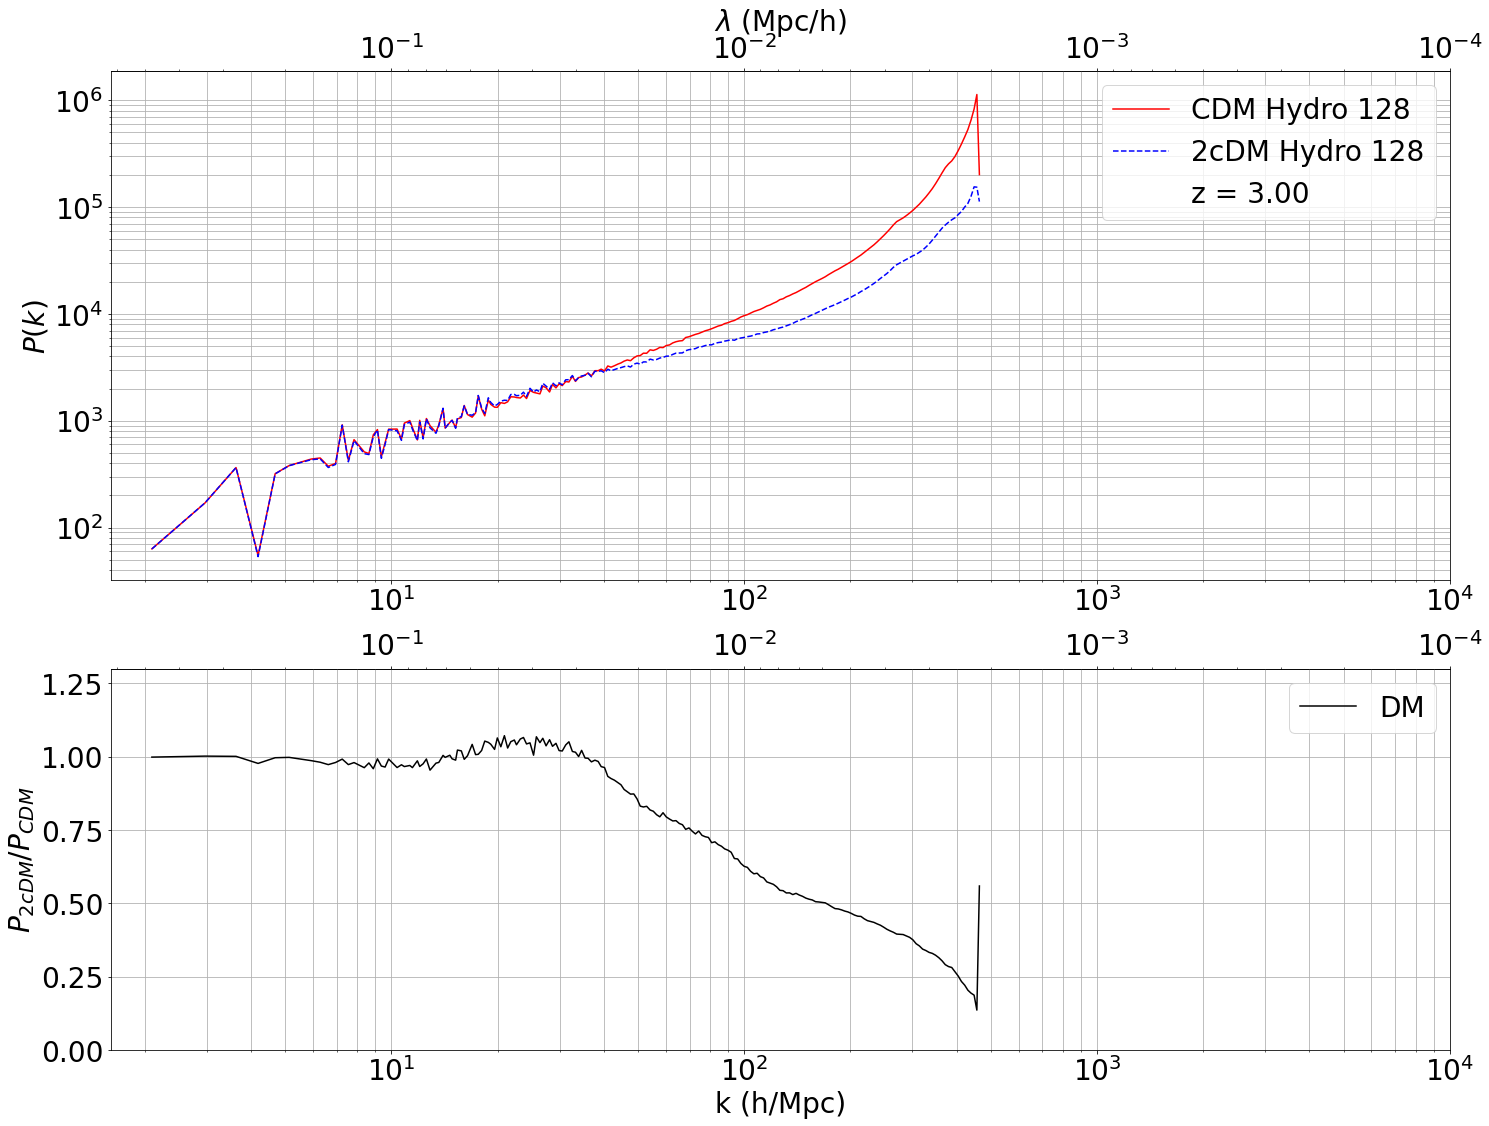

In [13]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [4, 3]})
"""ax0.plot(bins_cdm_1,dk_cdm_1, label='CDM DM 512', color='k')
ax0.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM DM 512', color='k')
ax0.plot(bins_cdm_2,dk_cdm_2, label='CDM Hydro 512', color='r')
ax0.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM Hydro 512', color='b')

ax0.plot(mbins_cdm_1,mdk_cdm_1, label='CDM DM 256', color='k')
ax0.plot(mbins_2cdm_1,mdk_2cdm_1, '--',label='2cDM DM 256', color='k')
ax0.plot(mbins_cdm_2,mdk_cdm_2, label='CDM Hydro 256', color='r')
ax0.plot(mbins_2cdm_2,mdk_2cdm_2, '--',label='2cDM Hydro 256', color='b')"""

#ax0.plot(lbins_cdm_1,ldk_cdm_1, label='CDM DM 128', color='k')
#ax0.plot(lbins_2cdm_1,ldk_2cdm_1, '--',label='2cDM DM 128', color='k')
ax0.plot(lbins_cdm_2,ldk_cdm_2, label='CDM Hydro 128', color='r')
ax0.plot(lbins_2cdm_2,ldk_2cdm_2, '--',label='2cDM Hydro 128', color='b')


#ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)

ax0.set_xlim(0, 10**4)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum $512^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

"""ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='b', label='Hydro')
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='k', label='DM')

ax1.plot(mbins_2cdm_1 ,mpk_2cdm_1 / mpk_cdm_1, color='b', label='Hydro')
ax1.plot(mbins_2cdm_2 ,mpk_2cdm_2 / mpk_cdm_2, color='k', label='DM')"""

#ax1.plot(lbins_2cdm_1 ,lpk_2cdm_1 / lpk_cdm_1, color='b', label='Hydro')
ax1.plot(lbins_2cdm_2 ,lpk_2cdm_2 / lpk_cdm_2, color='k', label='DM')



ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

#ax1.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)
#ax1.plot([],[], label='(0, 0) $\sigma = 1$', alpha=0)
#ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**4)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = 'by_Spectrum_with_Ratio_128.png'
plt.savefig(fpath+fname, dpi=128)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


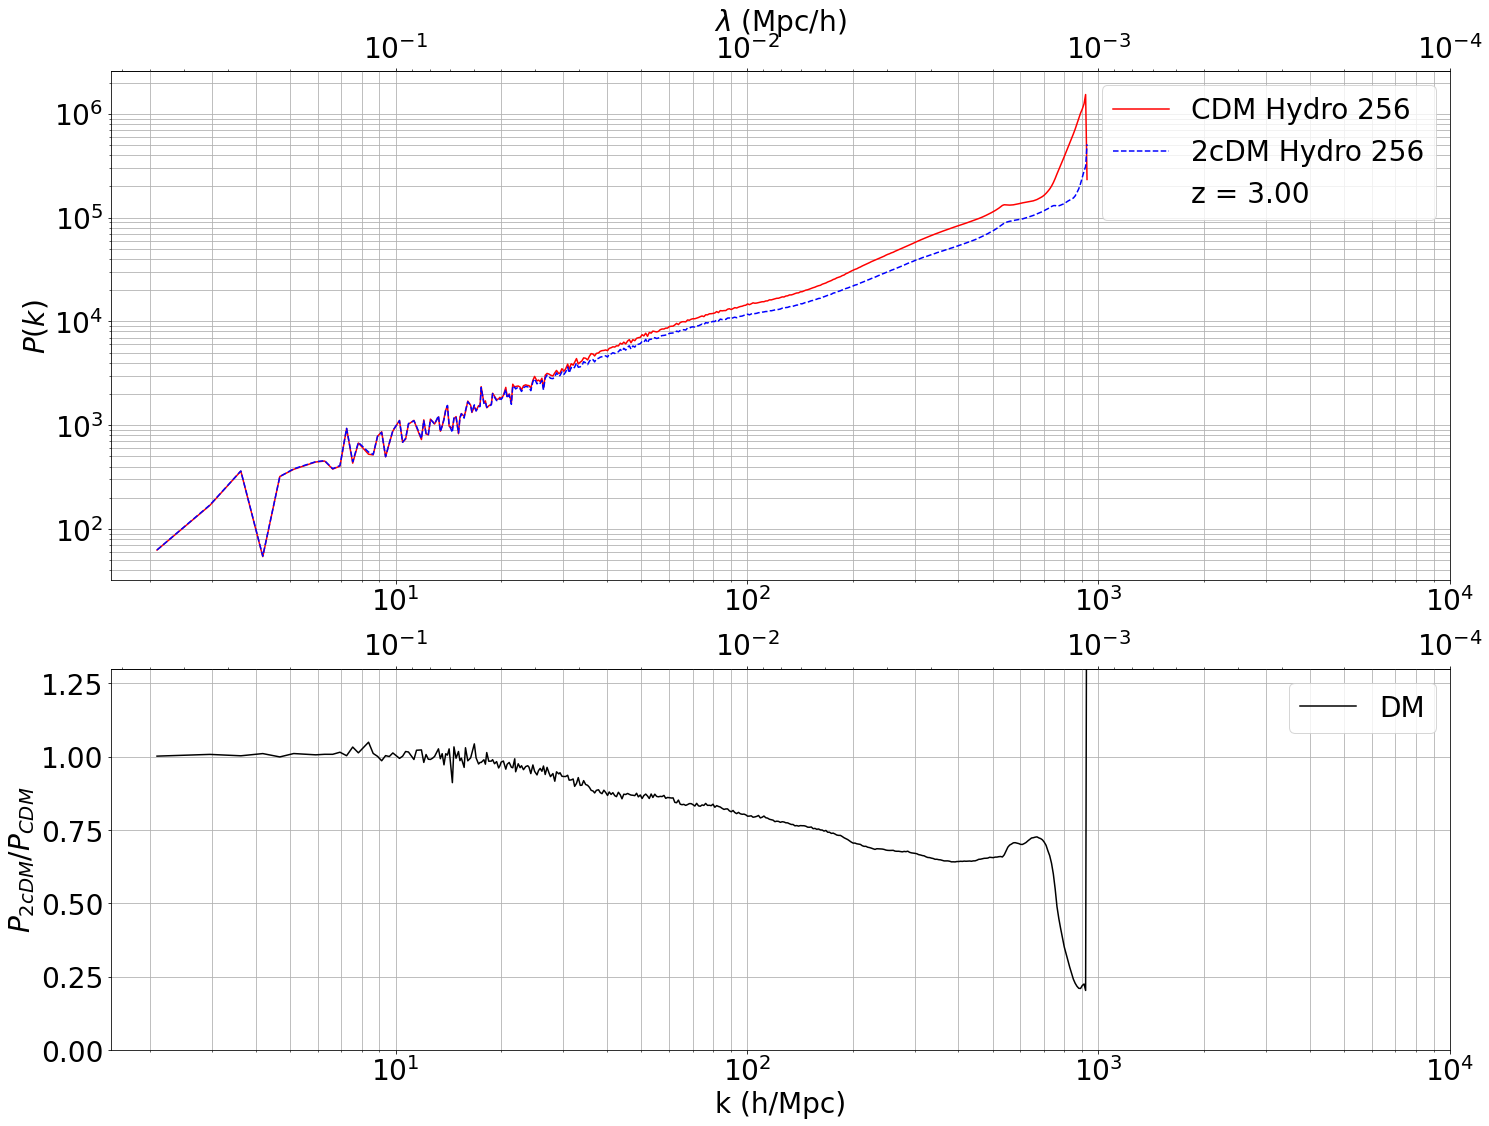

In [16]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [4, 3]})
"""ax0.plot(bins_cdm_1,dk_cdm_1, label='CDM DM 512', color='k')
ax0.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM DM 512', color='k')
ax0.plot(bins_cdm_2,dk_cdm_2, label='CDM Hydro 512', color='r')
ax0.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM Hydro 512', color='b')"""

#ax0.plot(mbins_cdm_1,mdk_cdm_1, label='CDM DM 256', color='k')
#ax0.plot(mbins_2cdm_1,mdk_2cdm_1, '--',label='2cDM DM 256', color='k')
ax0.plot(mbins_cdm_2,mdk_cdm_2, label='CDM Hydro 256', color='r')
ax0.plot(mbins_2cdm_2,mdk_2cdm_2, '--',label='2cDM Hydro 256', color='b')

"""ax0.plot(lbins_cdm_1,ldk_cdm_1, label='CDM DM 128', color='k')
ax0.plot(lbins_2cdm_1,ldk_2cdm_1, '--',label='2cDM DM 128', color='k')
ax0.plot(lbins_cdm_2,ldk_cdm_2, label='CDM Hydro 128', color='r')
ax0.plot(lbins_2cdm_2,ldk_2cdm_2, '--',label='2cDM Hydro 128', color='b')"""


#ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)

ax0.set_xlim(0, 10**4)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum $512^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

"""ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='b', label='Hydro')
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='k', label='DM')"""

#ax1.plot(mbins_2cdm_1 ,mpk_2cdm_1 / mpk_cdm_1, color='b', label='Hydro')
ax1.plot(mbins_2cdm_2 ,mpk_2cdm_2 / mpk_cdm_2, color='k', label='DM')

"""ax1.plot(lbins_2cdm_1 ,lpk_2cdm_1 / lpk_cdm_1, color='b', label='Hydro')
ax1.plot(lbins_2cdm_2 ,lpk_2cdm_2 / lpk_cdm_2, color='k', label='DM')"""



ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

#ax1.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)
#ax1.plot([],[], label='(0, 0) $\sigma = 1$', alpha=0)
#ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**4)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = 'by_Spectrum_with_Ratio_256.png'
plt.savefig(fpath+fname, dpi=128)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


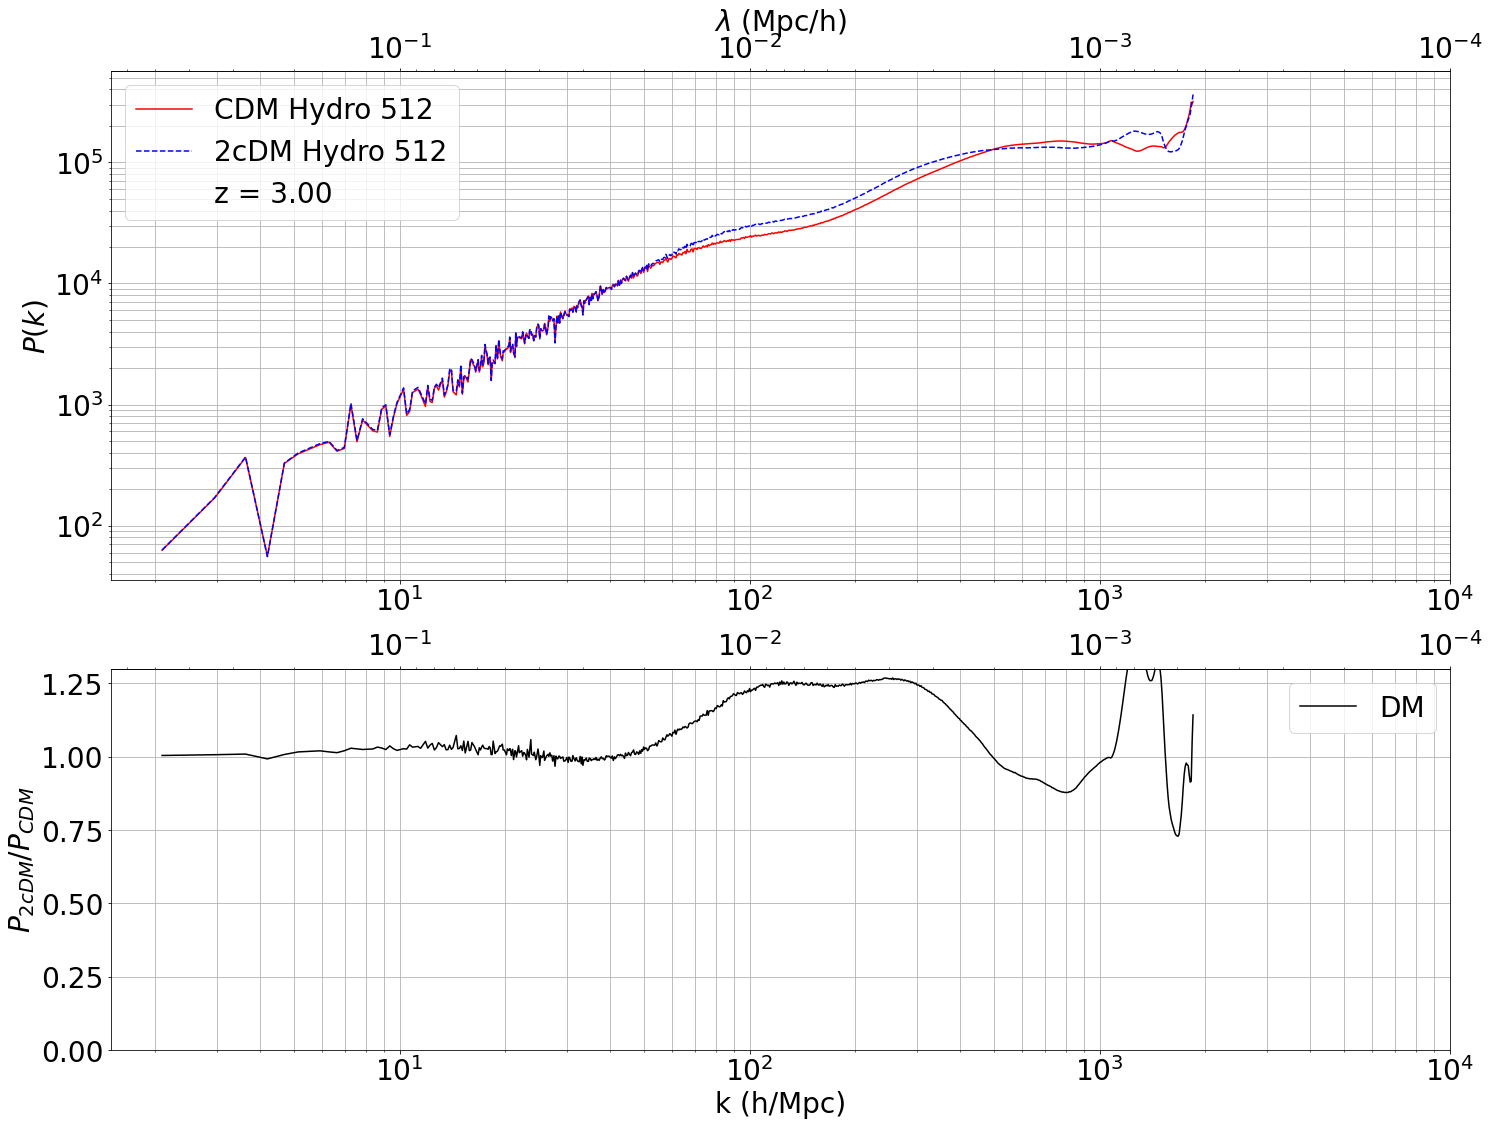

In [17]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [4, 3]})
#ax0.plot(bins_cdm_1,dk_cdm_1, label='CDM DM 512', color='k')
#ax0.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM DM 512', color='k')
ax0.plot(bins_cdm_2,dk_cdm_2, label='CDM Hydro 512', color='r')
ax0.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM Hydro 512', color='b')

"""ax0.plot(mbins_cdm_1,mdk_cdm_1, label='CDM DM 256', color='k')
ax0.plot(mbins_2cdm_1,mdk_2cdm_1, '--',label='2cDM DM 256', color='k')
ax0.plot(mbins_cdm_2,mdk_cdm_2, label='CDM Hydro 256', color='r')
ax0.plot(mbins_2cdm_2,mdk_2cdm_2, '--',label='2cDM Hydro 256', color='b')

ax0.plot(lbins_cdm_1,ldk_cdm_1, label='CDM DM 128', color='k')
ax0.plot(lbins_2cdm_1,ldk_2cdm_1, '--',label='2cDM DM 128', color='k')
ax0.plot(lbins_cdm_2,ldk_cdm_2, label='CDM Hydro 128', color='r')
ax0.plot(lbins_2cdm_2,ldk_2cdm_2, '--',label='2cDM Hydro 128', color='b')"""


#ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)

ax0.set_xlim(0, 10**4)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum $512^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

#ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='b', label='Hydro')
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='k', label='DM')

"""ax1.plot(mbins_2cdm_1 ,mpk_2cdm_1 / mpk_cdm_1, color='b', label='Hydro')
ax1.plot(mbins_2cdm_2 ,mpk_2cdm_2 / mpk_cdm_2, color='k', label='DM')

ax1.plot(lbins_2cdm_1 ,lpk_2cdm_1 / lpk_cdm_1, color='b', label='Hydro')
ax1.plot(lbins_2cdm_2 ,lpk_2cdm_2 / lpk_cdm_2, color='k', label='DM')"""



ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

#ax1.plot([],[], label='z = {}'.format(Redshift_CDM_2), alpha=0)
#ax1.plot([],[], label='(0, 0) $\sigma = 1$', alpha=0)
#ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**4)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = 'by_Spectrum_with_Ratio_512.png'
plt.savefig(fpath+fname, dpi=128)
plt.show()